# Beispiel mit Boston Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_boston()

In [3]:
class LinearRegression: 
    # Hier werden auch hauptsächlich wieder die Formeln umgesetzt (Hier ordinary least square)
    def __init__(self, use_intercept: bool = True):
    # Modellparameter bzw. Gewichte w:
    # Den Gewichten wurde in diesem Fall richtige Namen gegeben
        self.coef_: np.ndarray = None
        self.intercept_: np.ndarray = None
        self.use_intercept = use_intercept

    def _add_intercept(self, x: np.ndarray):
        # Hinufügen einer Spalte, damit wieder mit Matrizen gerechnet werden kann
        intercepts = np.ones(shape=(x.shape[0])) 
        x = np.column_stack((intercepts, x))
        return x
    
    def fit(self, x: np.ndarray, y: np.ndarray): # In Supervised Algorithmen gibt man sowohl x und y mit
        if self.use_intercept:
            x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray):
        # y = m * x + b bzw. hier y = coef_ * i + intercept_
        # y_pred = np.array([np.dot(self.coef_.T, x[i] + self.intercept_) for i in range(len(x))])
        # np.dot wird gebraucht, falls wir ein Problem mit 2 Features hätten. Dann wäre coef eben auch 2D.
        return (self.coef_ * x + self.intercept_)# So nur, falls es wirklich nur ein einzelnes Feature gibt

    def score(self, x: np.ndarray, y: np.ndarray): # R²
        y_mean = np.mean(y, axis = 0)
        y_pred = self.predict(x)
        numerator = np.sum((y - y_pred)**2)
        denumerator = np.sum((y - y_mean)**2)
        return (1 - (numerator/denumerator))

    


In [4]:
x = dataset.data[:, 5] # Nur das fünfte Feature nutzen (als Beispiel)
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [7]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_own = regr.score(x_test, y_test)
r2_sklearn = r2_score(y_test, y_pred)

print(f"Coef: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2_own: {r2_own}") # Entspricht nicht etwa einem Prozentwert, kann aber Werte [0 1]] annehmen
print(f"R2_sklearn: {r2_sklearn}")

Coef: [9.1181022]
Intercept: -34.66230743840655
R2_own: 0.45846499343030656
R2_sklearn: 0.45846499343030656


In [8]:
def plot_regressor(regr: LinearRegression, x: np.ndarray, y: np.ndarray):
    x_arange = np.arange(start = 3.0, stop = 10.0, step = 0.05)
    y_arange = regr.predict(x_arange)
    plt.scatter(x_train, y_train)
    plt.plot(x_arange, y_arange, color = "red")
    plt.show()

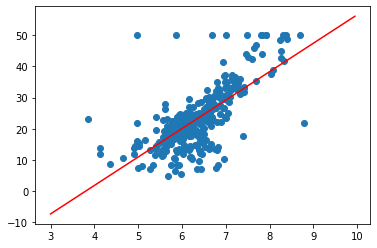

In [9]:
plot_regressor(regr, x_test, y_test)

In [31]:
def plot_residual(regr: LinearRegression, x: np.ndarray, y: np.ndarray, title: str): 
    # Restwertplot -> Wie weit sind wir mit unserer Prediction von der wahren Werten entfernt?
    y_pred = regr.predict(x)
    
    plt.scatter(y, y_pred - y, color = "blue", s = 8)
    plt.hlines(0, np.min(y) - 0.1, np.max(y) + 0.1, color = "red")
    plt.title(title)
    # x-Achse: Wahre y-Werte
    # y-Achse: Entfernung der Prediction zu den wahren Werten. 0 wäre gut!
    plt.show()

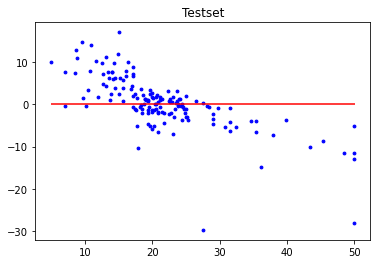

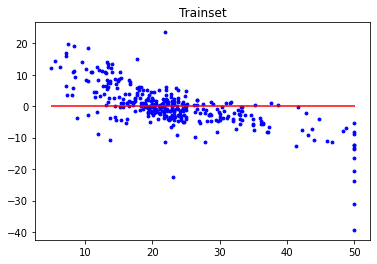

In [32]:
plot_residual(regr, x_test, y_test, title = "Testset")
plot_residual(regr, x_train, y_train, title = "Trainset")